In [53]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [56]:
 path='/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv'
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_noise_all_erp.csv'
dataset =pd.read_csv(path)

In [57]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=40) 

In [59]:
X_test.shape, y_test.shape

((757, 1428), (757,))

In [60]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([311, 446]))

In [61]:
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.0014005602240896359, 0.0007002801120448179]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [63]:
# # Average Scores
# #  print clf.cv_results_
# # clf.best_estimator_
# # np.mean
# scores=clf.cv_results_['mean_test_score']
# print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

In [64]:
pred=clf.best_estimator_.predict(X_test)
clf.score(X_test, y_test)  
# print pred
# print y_test

0.9194187582562747

In [65]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[272,  39],
       [ 22, 424]])

In [66]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.93      0.87      0.90       311
        1.0       0.92      0.95      0.93       446

avg / total       0.92      0.92      0.92       757



In [67]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9126353582397301

In [40]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [75]:
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1,10*.65],'gamma':[0.1,10**-3.20]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.9141347424042272
             precision    recall  f1-score   support

        0.0       0.92      0.87      0.89       311
        1.0       0.91      0.95      0.93       446

avg / total       0.91      0.91      0.91       757



In [77]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.907177771689761

In [41]:
# pred=clf.best_estimator_.predict(X_test)
# clf.score(X_test, y_test)  
# # print pred
# # print y_test

In [70]:
# k=0;j=68;
# for i in range(0,21):
#     print k,j
#     k=k+68;j=j+68;

In [43]:
k=0;j=68; acg=[];
for i in range(0,21):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acg=np.append(acg,acc)
    print acc
    print k,j
    k=k+68;j=j+68;
ind,acc=

0.7691266079891672
0 68
0.7948544346648612
68 136
0.7846987136086662
136 204
0.7725118483412322
204 272
0.7738659444820583
272 340
0.7853757616790792
340 408
0.7914691943127962
408 476
0.7461069735951252
476 544
0.7711577522004063
544 612
0.7779282329045363
612 680
0.7840216655382533
680 748
0.7738659444820583
748 816
0.7799593771157752
816 884
0.7745429925524713
884 952
0.7779282329045363
952 1020
0.7887610020311442
1020 1088
0.7698036560595802
1088 1156
0.7846987136086662
1156 1224
0.7657413676371022
1224 1292
0.7833446174678402
1292 1360
0.7725118483412322
1360 1428


In [44]:
clf.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00140056022409,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
yr=X_test[:,0:68]
yr.shape

(1477, 68)

In [46]:
dataset
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
# Xc

In [47]:
X.shape

(7384, 1428)

# Hemisphere

In [48]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=40) 
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8259986459038592
             precision    recall  f1-score   support

        0.0       0.78      0.77      0.77       568
        1.0       0.86      0.86      0.86       909

avg / total       0.83      0.83      0.83      1477



In [78]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.907177771689761

# LH

In [49]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=40) 
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8408937034529451
             precision    recall  f1-score   support

        0.0       0.79      0.80      0.79       568
        1.0       0.87      0.87      0.87       909

avg / total       0.84      0.84      0.84      1477



In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [50]:
# acg=[];
# for i in range(0,6,2):
#     acg=np.append(acg,i)

In [86]:
np.max(acg)

0.7948544346648612

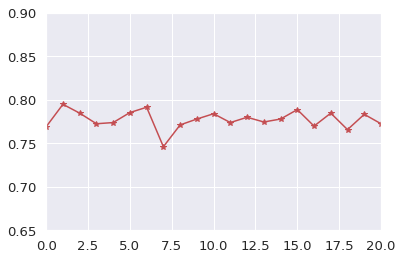

In [96]:
plt.plot(acg,'-*r')
plt.ylim(0.65,0.9)
plt.xlim(0,20)
plt.show()